In [1]:
import torch
import numpy as np
from torch.utils.data import DataLoader, Dataset
from torch import nn, optim
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def get_hist(model, ds):
    activation=model.activation(ds.x)
    for i, act in enumerate(activation):
        plt.hist(activation.numpy(),4,density=True)
        plt.title("Activation layer " + str(i+1))
        plt.xlabel("Activation")
        plt.legend()
        plt.show()

In [3]:
def Plot_data(X, Y, model=None, leg=False):
    plt.plot(X[Y == 0].numpy(), Y[Y == 0].numpy(), 'or', label='y = 0')
    plt.plot(X[Y == 1].numpy(), Y[Y == 1].numpy(), 'ob', label='y = 1')
    if model != None:
        plt.plot(X.numpy(), model(X).detach().numpy(), label='Neural Net')
    plt.legend()
    plt.show()

In [4]:
class Data(Dataset):
    def __init__(self):
        self.x = torch.linspace(-20, 20, 100).view(-1, 1)
        self.y = torch.zeros(self.x.shape[0])
        self.y[(self.x[:, 0] > -10) & (self.x[:, 0] < -5)] = 1
        self.y[(self.x[:, 0] > 5) & (self.x[:, 0] < 10)] = 1
        self.y = self.y.view(-1, 1)
        self.len = self.x.shape[0]
        
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    def __len__(self):
        return self.len

In [5]:
class Net(nn.Module):
    def __init__(self, dim_in, dim_H, dim_out):
        super(Net, self).__init__()
        self.Seq1 = nn.Sequential(nn.Linear(dim_in, dim_H), nn.Sigmoid())
        self.Seq2 = nn.Sequential(nn.Linear(dim_H, dim_out), nn.Sigmoid())
        
    def forward(self, x):
        x = self.Seq1(x)
        x = self.Seq2(x)
        return x

In [10]:
def train_model(ds, model, criterion, train_loader, optimizer, epochs=5, plot_number=10):
    cost = []
    for epoch in range(epochs):
        epoch_cost = 0
        for x, y in train_loader:
            y_hat = model(x)
            loss = criterion(y_hat, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            epoch_cost += loss.item()
            
        if epoch % plot_number == 0:
            Plot_data(ds.x, ds.y, model)
        cost.append(epoch_cost)
    plt.figure()
    plt.plot(cost)
    plt.xlabel('Epoch')
    plt.ylabel('Cost')
    plt.show()
    return cost

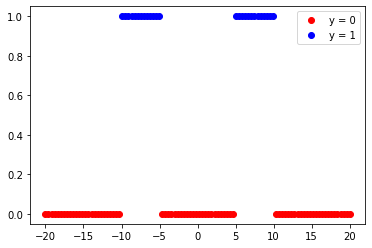

In [11]:
ds = Data()
Plot_data(ds.x, ds.y)

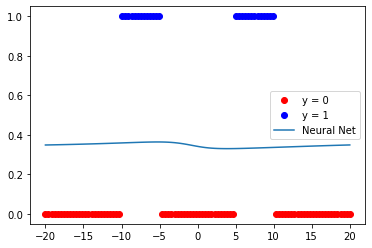

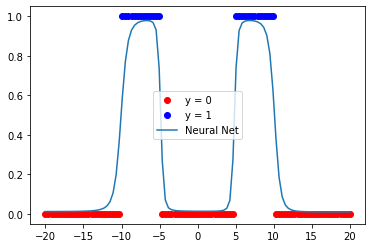

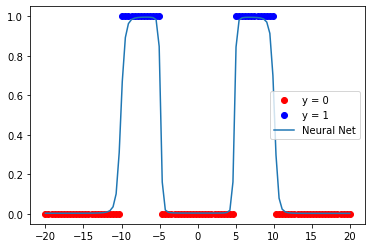

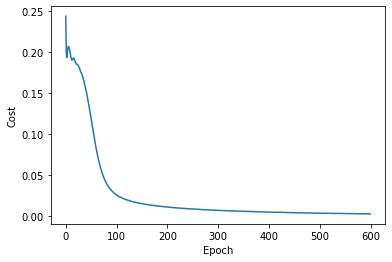

In [22]:
torch.manual_seed(0)
model = Net(1, 9, 1)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.1) # Adam is used because of the larger batch_size
train_loader = DataLoader(dataset=ds, batch_size=100)
COST = train_model(ds, model, criterion, train_loader, optimizer, epochs=600, plot_number=200)

In [31]:
y_hat = model(ds.x)
label = torch.where(y_hat > 0.5, torch.tensor([1]), torch.tensor([0]))
training_accuracy = torch.mean(torch.where((label == ds.y), torch.FloatTensor([1]), torch.FloatTensor([0])))
print('Training Accuracy:', training_accuracy.numpy()) # Perfect

Training Accuracy: 1.0
